In [1]:
import numpy as np
import lammas as la
import matplotlib.pyplot as plt

# LAMMAS Example notebook

Welcome to LAMMAS by T. R. G. Richardson. This simple library uses sparsity estimate the time of the last major merger of a dark matter halo, see Richardson & Corasaniti (in prep.) for details. If you use LAMMAS for scientific publications please reffer to the aforemention publication.

dependencies: 
- numpy
- scipy
- matplotlib
- emcee
- h5py

The notebook is designed to showcase the base functionallities of LAMMAS. 

## QUICKSTART COMANDLINE MODE

Within this repository you'll find a quick start script lammasGO.py. To use this script form the terminal excute the following.

$\texttt{python lammasGO.py}$

Specifying the masses and redshift of the cluster can either be done in the terminal using the,

$\texttt{-m}$ "$M_{200c}$"  "$M_{500c}$"  "$M_{2500c}$"  and $\texttt{-z}$ "$z$" arguments.

Or through a file containing only on the first line the three masse in order and on the second line the redshift, Something resembling:

----------------------
"$M_{200c}$"  "$M_{500c}$"  "$M_{2500c}$"

"$z$"

---------------------

This file is then specified at execution using:

$\texttt{-f file}$

Masses can be specified in log scale. If this is the case use the $\texttt{-l}$ argument.

The output directory can be changed using:

$\texttt{-o path}$

this path default to $\texttt{./outputs}$
WARNING: the script will overwrite any previous outputs within this directory

Finally the verbosity is controlled using the $\mathtt{-v}$ argument

Putting all of this together here are some exectution examples for Abell 117

$\texttt{python lammasGO.py -m 30.9 22.9 4.9 -z 0.055 -o . -v}$

$\texttt{python lammasGO.py -f data.dat -o ./A117 -l}$

with data.dat containing:

-----
14.49 14.39 13.96

0.055
____


## NOTEBOOK MODE

A more modular way of using lammas is within scripts or notebooks. lammas is built around the MergerTimer class here we will show how to set up this object and access the data once the calculations are done.

Let us get started with a typical input needed to set up the timer. 

Here we take the example of Abell 117. Let us start with mass definitions, the units don't matter as long as everything is consitent, here we're using $10^{14} M_\odot$, along with the redshift at which the cluster is observed.


In [2]:
M200 = 30.90
M500 = 22.9
M2500 = 4.90

z = 0.055

We then define the cosmology. Here we are using Planck 2018 as it is the cosmology used for the Uchuu simulations on which the timer is calibrated.

In [3]:
H0 = 67.77
Om = 0.307115
OL = 0.692885

### Simple set-up

This set up is all that is needed to use LAMMAS

The MCMC sampler can use three types of prior: "flat-a", "flat-z" and "flat-t" depending on the need.

Note that the Timmer can function using only M200 and M500.

In [4]:
%%time
# Define the Cosmo Clock which will take care of all the 
clock = la.CosmoClock(H0,Om,OL)
# Define the Merger Timer
timer = la.MergerTimer(M200, M500, M2500, z_obs = z, clock = clock, verbose = True, prior = 'flat-a')
# Run the code!
res = timer.run()

Initialising Timer
Importing parmater grids and setting up parameter vectors at z = 0.055
M2500 specified allowing 3 sparsity estimation!
Timer is ready, use MergerTimer.run() to run the timer
Calculating analytical p-value... Done!
Sampling 1 sparsity posterior... Done!
Found interval, coresponding probability is 0.6799999999999999
Sampling 3 sparsity posterior... Done!
Initial attempt failed to converge, trying brute force.


/obs/trichardson/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:397: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/obs/trichardson/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:399: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +


Found interval, coresponding probability is 0.6799999995466918
All Done!
CPU times: user 55.7 s, sys: 993 ms, total: 56.7 s
Wall time: 55.2 s


### Plotting the outputs

While you can manually access the results of the calculations as we'll see in the advanced section LAMMAS offers the posibility to directly plot the posterior distributions that have been calculated. These routines have been designed forthe lammmasGO quickstart script in mind.

The $\texttt{timer.plot_posteriors}$ method takes two arguments $\texttt{plottype}$ defining the axis type, acceptable options are, None (linear x and y), "semilogx", "semilogy", "loglog". The second argument $\texttt{x_axis}$ defines which variable one wants to put on the x axis, currently supported are the "a", "z" and "t" (lookback time). This method returns an editable matplotlib axis object that allows you to modify the resulting figure at will.

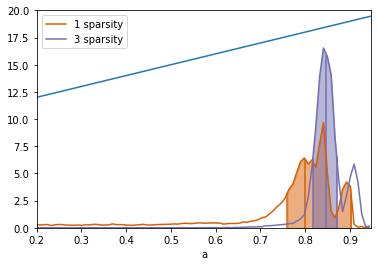

In [5]:
ax = timer.plot_posteriors(plottype = None, x_axis = "a")
ax.set_xlim(0.2,1/(z + 1)) # Change axis limits
ax.set_ylim(0,20)
ax.plot([0,1],[10,20]) # Add additional lines to plots
plt.show()

(0.0, 3.0)

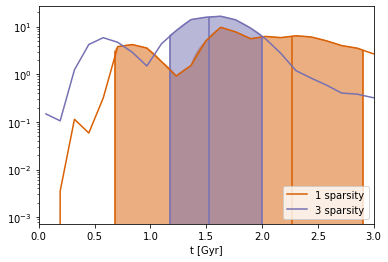

In [6]:
timer.plot_posteriors(plottype = 'semilogy', x_axis = "t")
plt.xlim(0,3)

### LaTeX friendly outputs

Finally the estimated scale factor, redshit and time of the last major merger can be output in a LaTeX readable format.

In [7]:
latex = timer.latexise_results()

1D estimate:
$a_\text{LMM} = 0.8^{+0.1}_{-0.04}$
$z_\text{LMM} = 0.25^{+0.07}_{-0.1}$
$t_\text{LMM} = 2.27^{+0.6}_{-2e+00}$ Gyr
3D estimate:
$a_\text{LMM} = 0.847^{+0.02}_{-0.03}$
$z_\text{LMM} = 0.18^{+0.04}_{-0.03}$
$t_\text{LMM} = 1.53^{+0.5}_{-0.4}$ Gyr


## ADVANCED MODE

The raw outputs of the MCMC can be accessed allowing one complete freedom. Chains can be accessed using the $\texttt{get_chains}$ method from the timer.

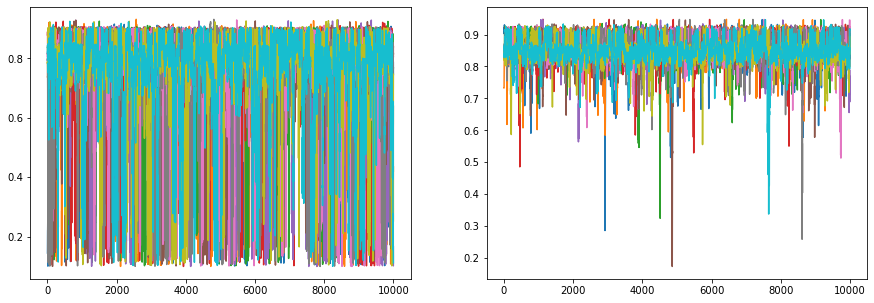

In [8]:
chains1D, chains3D = timer.get_chains()

fig, ax  = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(np.hstack(chains1D).T);
ax[1].plot(np.hstack(chains3D).T);

Due to the importance of checking the convergenge of MCMCs the computation of the Gelman-Rubin convergence criterion is included as a method of the timer.

In [9]:
print(timer.Gelman_Rubin())

[1.008451124338038, 1.0050393619808977]


One can access the data used for the posterior plots within the $\texttt{res}$ dictionary
- 'pval' : 1 sparsity frequentist p-value
- 'a_LMM' : x axis points where the posterior is evalutated, in units of scale factor of Last Major Merger
- 'post1D' : 1 sparsity posterior
- 'cred_interval_1D' : 1 sparsity credible interval
- 'BF1D' : 1 sparsity Bayes factor
- 'post3D' : 3 sparsity posterior
- 'cred_interval_3D' :  sparsity credible interval
- 'BF3D' : 1 sparsity Bayes factor

In [10]:
res.keys()

dict_keys(['pval', 'a_LMM', 'post1D', 'cred_interval_1D', 'BF1D', 'post3D', 'cred_interval_3D', 'BF3D'])

Create one own plots...

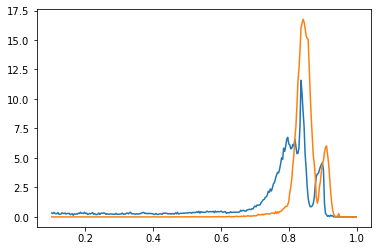

In [11]:
p_1d, bins = np.histogram(chains1D.flatten(), bins = np.linspace(0.1, 1,300), density = True)
p_3d, bins = np.histogram(chains3D.flatten(), bins = np.linspace(0.1, 1,300), density = True)
a = .5*(bins[1:] + bins[:-1])
plt.plot(a, p_1d)
plt.plot(a, p_3d)

... or measure what ever statistic.

In [12]:
print(np.mean(chains1D), np.var(chains1D))

0.7394111013026023 0.03108634934474364


## (WIP) Uncertainties

Uncertainties can be passed to the MergerTimer upon definition. In the current implentation they are only used to weight the calculation of the p-value,
$$p = 1 - \int \rho_\text{obs} (s_\text{obs})ds_\text{obs}\int_0^{s_\text{obs} - 1}\rho(x|\mathcal{H}_0)dx$$
Where $\rho_{obs}$ is the pdf associated to the observational uncertainty.

The large number arguments makes it clearer to use a kwargs dictionary in this case.

In [13]:
M200, dM200 = (30.90, 7.12) #1e14 M_sol
M500, dM500 = (22.9, 5.3) #1e14 M_sol
M2500, dM2500 = (4.90, 1.13) #1e14 M_sol
z = 0.055

H0 = 67.77
Om = 0.307115
OL = 0.692885

clock = la.CosmoClock(H0,Om,OL)
params = {'M200':M200, 'dM200':dM200, 'M500':M500, 'dM500':dM500, 'M2500':M2500, 'dM2500':dM2500,
          'z_obs':z, 'clock':clock, 'verbose':True, 'prior':'flat-a'}
timer = la.MergerTimer(**params)
res = timer.run()

Initialising Timer
Importing parmater grids and setting up parameter vectors at z = 0.055
M2500 specified allowing 3 sparsity estimation!
Timer is ready, use MergerTimer.run() to run the timer
Calculating analytical p-value... Incorporating errors on masses... Done!
Sampling 1 sparsity posterior... Done!
Found interval, coresponding probability is 0.6799999999999884
Sampling 3 sparsity posterior... Done!
Initial attempt failed to converge, trying brute force.
Found interval, coresponding probability is 0.6799999999999833
All Done!


/obs/trichardson/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:397: RuntimeWarning: invalid value encountered in true_divide
  h0divh1 = h0 / h1
/obs/trichardson/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:399: RuntimeWarning: invalid value encountered in true_divide
  y[slice1]*hsum*hsum/hprod +


An additional field, $\text{'pval_unc'}$,can now be found in $\texttt{res}$. This is the p-value incorporating the uncertainty on $s_{200,500}$

In [14]:
print(f'Considering only the central value, p = {res["pval"]:.3}')
print(f'Considering the uncertainty, p = {res["pval_unc"]:.3}')

Considering only the central value, p = 0.559
Considering the uncertainty, p = 0.532


### Thank you for using LAMMAS :D